In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
print(tf.__version__)

2.17.1


In [ ]:
IMAGE_SIZE = 224
BATCH_SIZE =32
CHANNELS = 3
EPOCHS = 60

In [ ]:
import os

# Chemins des sous-dossiers
#pneum_folder = "/content/drive/MyDrive/2_class/PNEUMONIA"
#normal_folder = "/content/drive/MyDrive/2_class/NORMAL"
fib_folder = "/content/drive/MyDrive/2_class/Fibrosis"
covid_folder = "/content/drive/MyDrive/2_class/COVID"
#tuber_folder = "/content/drive/MyDrive/2_class/Tuberculosis"

# Fonction pour compter les fichiers dans un dossier
def count_images(folder_path):
    return len([file for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))])

# Compter les images dans chaque sous-dossier
#pneum_count = count_images(pneum_folder)
#normal_count = count_images(normal_folder)
fib_count = count_images(fib_folder)
covid_count = count_images(covid_folder)
#tuber_count = count_images(tuber_folder)

# Afficher le nombre d'images dans chaque dossier
#print(f"Nombre d'images dans le dossier PNEUMONIA: {pneum_count}")
##print(f"Nombre d'images dans le dossier NORMAL: {normal_count}")
print(f"Nombre d'images dans le dossier Fibrosis: {fib_count}")
print(f"Nombre d'images dans le dossier COVID: {covid_count}")
#print(f"Nombre d'images dans le dossier Tuberculosis: {tuber_count}")


Nombre d'images dans le dossier Fibrosis: 1686
Nombre d'images dans le dossier COVID: 2124


In [ ]:
import os
import shutil
import random

source_dir = "/content/drive/MyDrive/2_class"
target_dir = "/content/drive/MyDrive/2_class_subset"

# Crée le dossier cible s'il n'existe pas
if not os.path.exists(target_dir):
    os.makedirs(target_dir)

# Limite le nombre d'images par classe à 700
limit_per_class = 700

for class_name in os.listdir(source_dir):
    class_dir = os.path.join(source_dir, class_name)
    if os.path.isdir(class_dir):
        # Sélectionne aléatoirement 700 images
        images = os.listdir(class_dir)
        selected_images = random.sample(images, min(len(images), limit_per_class))

        # Crée le dossier de la classe cible
        target_class_dir = os.path.join(target_dir, class_name)
        os.makedirs(target_class_dir, exist_ok=True)

        # Copie les images sélectionnées
        for image_name in selected_images:
            source_path = os.path.join(class_dir, image_name)
            target_path = os.path.join(target_class_dir, image_name)
            shutil.copy(source_path, target_path)


In [ ]:
import os

# Chemins des sous-dossiers
pneum_folder = "/content/drive/MyDrive/chest_xray/dataset_chest_pneumonia_tuberculosis_subset2/PNEUMONIA"
normal_folder = "/content/drive/MyDrive/chest_xray/dataset_chest_pneumonia_tuberculosis_subset2/NORMAL"
fib_folder = "/content/drive/MyDrive/chest_xray/dataset_chest_pneumonia_tuberculosis_subset2/Fibrosis"
covid_folder = "/content/drive/MyDrive/chest_xray/dataset_chest_pneumonia_tuberculosis_subset2/COVID"
tuber_folder = "/content/drive/MyDrive/chest_xray/dataset_chest_pneumonia_tuberculosis_subset2/Tuberculosis"

# Fonction pour compter les fichiers dans un dossier
def count_images(folder_path):
    return len([file for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))])

# Compter les images dans chaque sous-dossier
pneum_count = count_images(pneum_folder)
normal_count = count_images(normal_folder)
fib_count = count_images(fib_folder)
covid_count = count_images(covid_folder)
tuber_count = count_images(tuber_folder)

# Afficher le nombre d'images dans chaque dossier
print(f"Nombre d'images dans le dossier PNEUMONIA: {pneum_count}")
print(f"Nombre d'images dans le dossier NORMAL: {normal_count}")
print(f"Nombre d'images dans le dossier Fibrosis: {fib_count}")
print(f"Nombre d'images dans le dossier COVID: {covid_count}")
print(f"Nombre d'images dans le dossier Tuberculosis: {tuber_count}")


Nombre d'images dans le dossier PNEUMONIA: 700
Nombre d'images dans le dossier NORMAL: 700
Nombre d'images dans le dossier Fibrosis: 700
Nombre d'images dans le dossier COVID: 700
Nombre d'images dans le dossier Tuberculosis: 700


In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/chest_xray/dataset_chest_pneumonia_tuberculosis_subset2",
    #"/content/drive/MyDrive/chest_xray/dataset_chest_pneumonia_tuberculosis",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 3500 files belonging to 5 classes.


In [ ]:
class_name = dataset.class_names
class_name

['COVID', 'Fibrosis', 'NORMAL', 'PNEUMONIA', 'Tuberculosis']

In [ ]:
len(dataset)

110

In [ ]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 224, 224, 3)
[4 2 4 0 3 2 1 3 1 1 2 2 4 2 4 1 0 3 3 2 4 1 3 1 0 0 4 4 1 3 2 3]


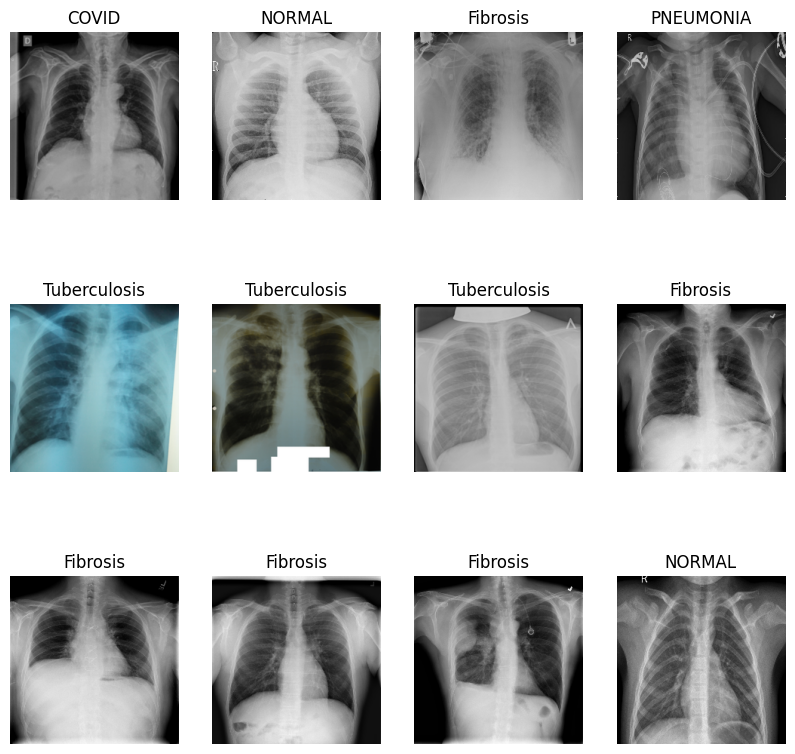

In [ ]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        ax.imshow(image_batch[i].numpy().astype('uint8'))
        ax.set_title(class_name[label_batch[i].numpy()])
        ax.axis("off")
plt.show()


In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, test_split=0.1, val_split=0.1, shuffle=True, shuffle_size = 10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

88

In [ ]:
len(val_ds)

11

In [ ]:
len(test_ds)

11

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    #layers.RandomRotation(0.2),
])

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 5
model = tf.keras.Sequential([
    layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),  # Spécifie la forme des données d'entrée
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax'),
])


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    epochs = 60,
    batch_size = 64,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/60
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - accuracy: 0.3793 - loss: 3.1495 - val_accuracy: 0.7784 - val_loss: 0.6512
Epoch 2/60
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.7652 - loss: 0.6436 - val_accuracy: 0.8295 - val_loss: 0.5328
Epoch 3/60
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.8004 - loss: 0.5754 - val_accuracy: 0.8068 - val_loss: 0.5456
Epoch 4/60
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.8304 - loss: 0.4585 - val_accuracy: 0.8665 - val_loss: 0.3881
Epoch 5/60
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - accuracy: 0.8285 - loss: 0.5340 - val_accuracy: 0.8494 - val_loss: 0.4651
Epoch 6/60
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.8614 - loss: 0.3898 - val_accuracy: 0.8352 - val_loss: 0.4847
Epoch 7/60
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.8748 - loss: 0.3371 - val_accuracy: 0.8466 - val_loss: 0.5076
Epoch 8/60
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.8872 - loss: 0.2992 - val_accuracy: 0.9006 -

In [ ]:
model.evaluate(test_ds)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9836 - loss: 0.1577


[0.2056991457939148, 0.96875]

In [ ]:
#model.evaluate(test_ds)

11/11 ━━━━━━━━━━━━━━━━━━━━ 45s 36ms/step - accuracy: 0.9165 - loss: 0.2710


[0.1977616399526596, 0.9346590638160706]

In [ ]:
def predict_dataset(model, dataset, class_names):
    y_true = []
    y_pred = []

    # Parcourir le dataset pour faire des prédictions
    for images, labels in dataset:
        predictions = model.predict(images)
        predicted_classes = np.argmax(predictions, axis=1)
        y_pred.extend(predicted_classes)
        y_true.extend(labels.numpy())  # Ajouter les étiquettes vraies

    return np.array(y_true), np.array(y_pred)


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Prédire sur le dataset de test
y_true, y_pred = predict_dataset(model, test_ds, class_name)

# Générer le rapport de classification
report = classification_report(y_true, y_pred, target_names=class_name)
print(report)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
              precision    recall  f1-score   support

       COVID       0.97      0.97      0.97        59
    Fibrosis       0.96      0.99      0.97        71
      NORMAL       0.92      0.97      0.95        63
   PNEUMONIA       1.00      0.95      0.97        82
Tuberculosis       0.99      0.97      0.98        77

    accuracy                           0.97       352
   macro avg       0.97      0.97      0.97       352
weighted avg       0.97      0.97      0.97       352



In [ ]:
import numpy as np
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


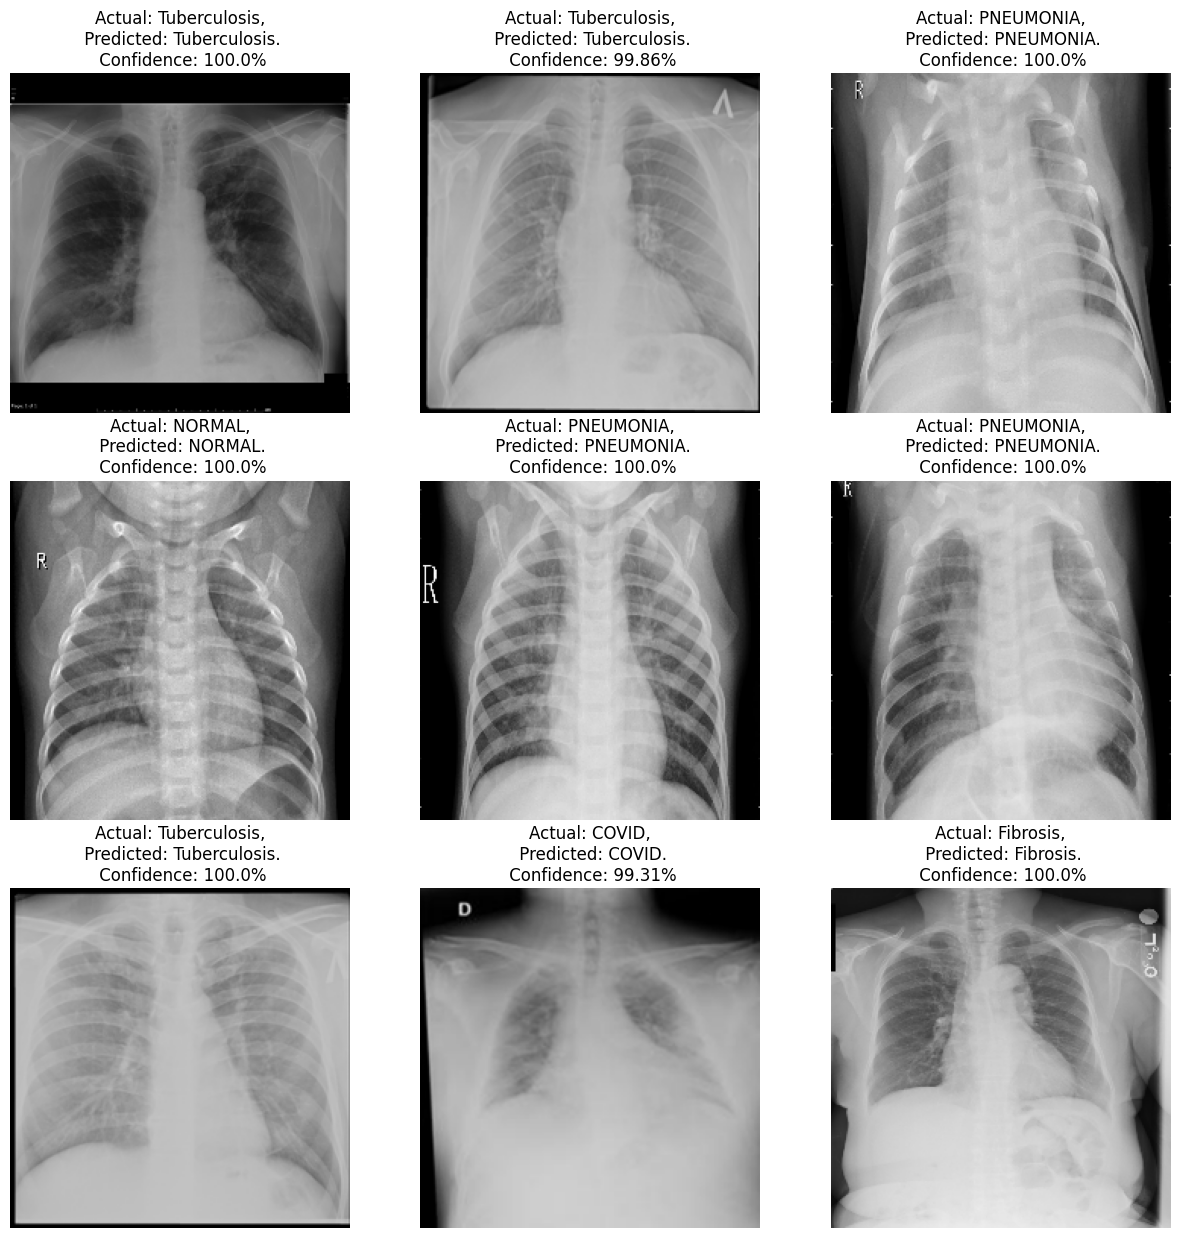

In [ ]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))

    predicted_class, confidence = predict(model, images)
    actual_class = class_name[labels[i]]

    plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

    plt.axis('off')


In [ ]:
model.save('/content/drive/MyDrive/chest_xray_model_5_classes_v2.keras')

In [ ]:
model.export('/content/drive/MyDrive/chest_xray_model_5_classes_v2')

Saved artifact at '/content/drive/MyDrive/chest_xray_model_5_classes_v2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_25')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  137555258559472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137555276196576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137552543211312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137552537047232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137552537045296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137552537045648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137552537054624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137552537043008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137552537056736: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 5
model = tf.keras.Sequential([
    layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),  # Spécifie la forme des données d'entrée
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax'),
])


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    epochs = 100,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 20s 152ms/step - accuracy: 0.4489 - loss: 2.1591 - val_accuracy: 0.7869 - val_loss: 0.5861
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 0.7739 - loss: 0.5906 - val_accuracy: 0.8210 - val_loss: 0.5140
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - accuracy: 0.8171 - loss: 0.5077 - val_accuracy: 0.8608 - val_loss: 0.3976
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.8813 - loss: 0.3492 - val_accuracy: 0.8551 - val_loss: 0.3807
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - accuracy: 0.8945 - loss: 0.2838 - val_accuracy: 0.9119 - val_loss: 0.2637
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - accuracy: 0.9178 - loss: 0.2343 - val_accuracy: 0.9119 - val_loss: 0.2752
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - accuracy: 0.9301 - loss: 0.2062 - val_accuracy: 0.9205 - val_loss: 0.2331
Epoch 8/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - accuracy: 0.9080 - loss: 0.2721 - val_accur

In [ ]:
model.evaluate(test_ds)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9631 - loss: 0.2972


[0.2801591157913208, 0.96875]

In [ ]:
#model.evaluate(test_ds)

11/11 ━━━━━━━━━━━━━━━━━━━━ 40s 58ms/step - accuracy: 0.9363 - loss: 0.1846


[0.17707769572734833, 0.9403409361839294]

In [ ]:
model.save('/content/drive/MyDrive/chest_xray_model_5_classes.keras')


In [ ]:
model.export('/content/drive/MyDrive/chest_xray_model_5_classes')

Saved artifact at '/content/drive/MyDrive/chest_xray_model_5_classes'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor_33')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  137835198914176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137837448730704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137834324920976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137834324923968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137834324919920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137834324925728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137834324924848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137834324927488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137834324922560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137834324929072: TensorSpec(shape=(), dtype=tf.r

In [ ]:
model_5_classes = tf.keras.models.load_model('/content/drive/MyDrive/chest_xray_model_5_classes.keras')

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


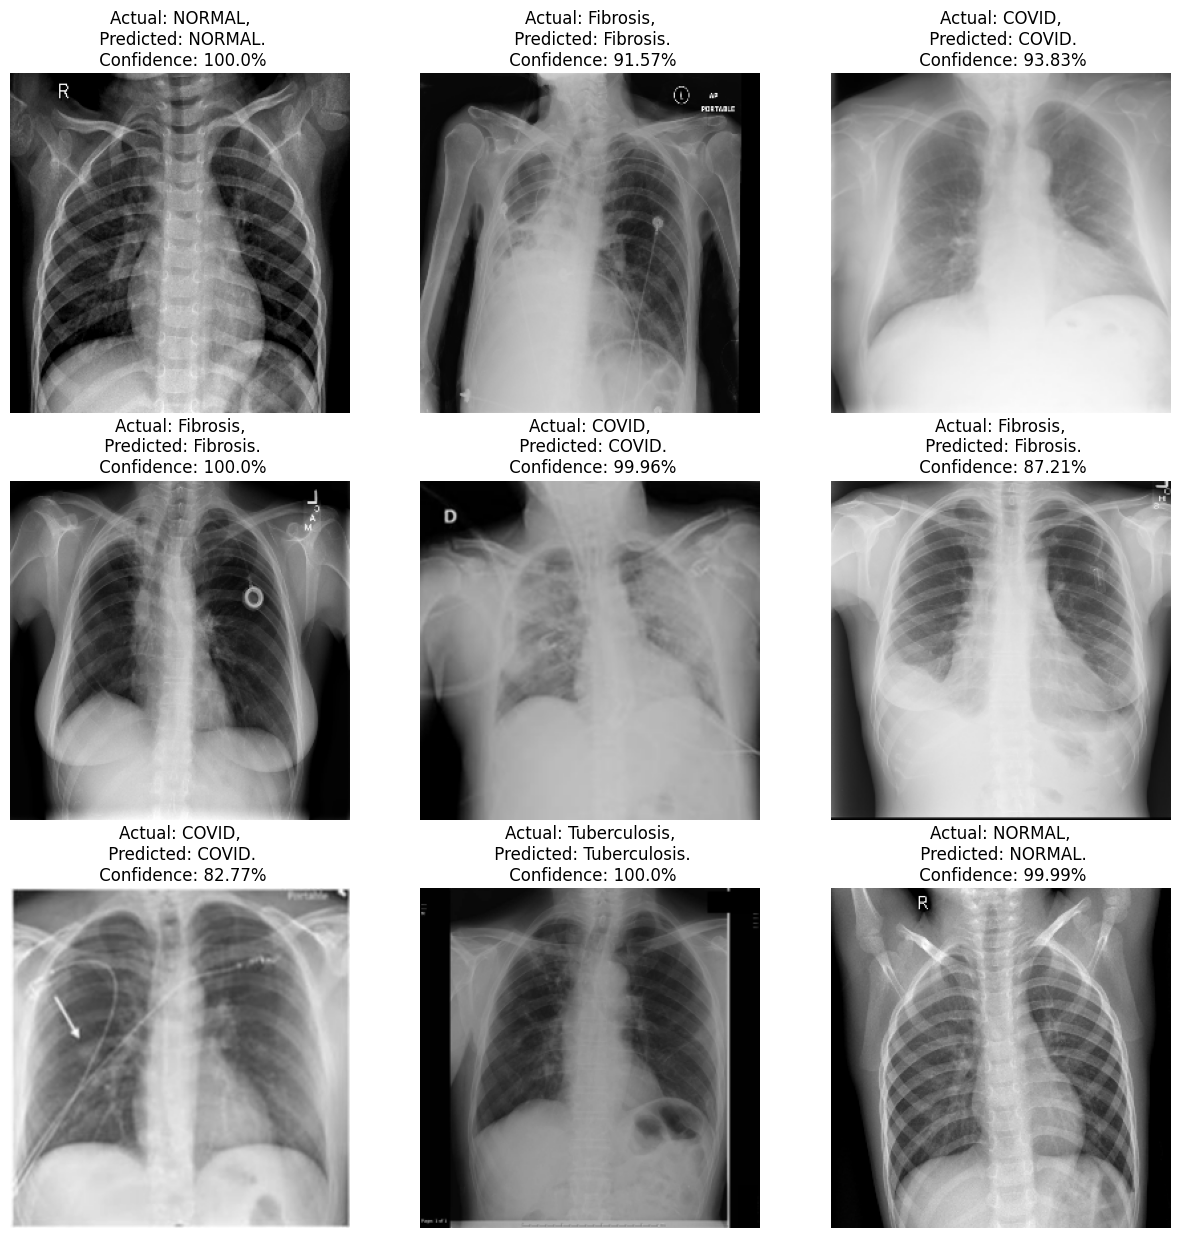

In [ ]:
import numpy as np
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))

    predicted_class, confidence = predict(model_5_classes, images)
    actual_class = class_name[labels[i]]

    plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

    plt.axis('off')


In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 5
model = tf.keras.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax'),
])
model.build(input_shape = input_shape)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    epochs = 100,
    batch_size = 32,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 93s 520ms/step - accuracy: 0.2135 - loss: 1.6045 - val_accuracy: 0.3125 - val_loss: 1.4442
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 57s 62ms/step - accuracy: 0.3258 - loss: 1.4606 - val_accuracy: 0.4489 - val_loss: 1.2571
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.5109 - loss: 1.1134 - val_accuracy: 0.5824 - val_loss: 1.0067
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.5874 - loss: 0.9752 - val_accuracy: 0.6278 - val_loss: 1.0356
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.5957 - loss: 0.9003 - val_accuracy: 0.6534 - val_loss: 0.8935
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - accuracy: 0.6870 - loss: 0.7918 - val_accuracy: 0.7017 - val_loss: 0.7709
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.6884 - loss: 0.7720 - val_accuracy: 0.6250 - val_loss: 0.9241
Epoch 8/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.7418 - loss: 0.6949 - val_accurac

In [ ]:
model.evaluate(test_ds)

11/11 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.8478 - loss: 0.4841


[0.455468088388443, 0.8522727489471436]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')

In [ ]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))

    predicted_class, confidence = predict(model, images)
    actual_class = class_name[labels[i]]

    plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

    plt.axis('off')


In [ ]:
#!pip install tensorflow==2.13.0
#!pip install --upgrade tensorflow-hub

import numpy as np
import cv2

import PIL
import PIL.Image as Image
import os
import datetime
import time


%load_ext tensorboard
import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

mobilenet_v2 ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
inception_v3 = "https://tfhub.dev/google/imagenet/inception_v3/classification/5"

classifier_model = mobilenet_v2


In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/chest_xray/dataset_chest_pneumonia_tuberculosis_subset2",
    #"/content/drive/MyDrive/chest_xray/dataset_chest_pneumonia_tuberculosis",
    shuffle = True,
    image_size = (224, 224),
    batch_size = 32
)

Found 3500 files belonging to 5 classes.


In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, test_split=0.1, val_split=0.1, shuffle=True, shuffle_size = 10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y)) # Where x—images, y—labels.
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y)) # Where x—images, y—labels.
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y)) # Where x—images, y—labels.


In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
mobilenet_v2 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

feature_extractor_model = mobilenet_v2


In [ ]:
feature_extractor_layer = hub.KerasLayer(
    feature_extractor_model,
    input_shape=(224, 224, 3),
    trainable=False)

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

# Assuming you have 'data_augmentation' and 'feature_extractor_layer' defined

num_classes = len(class_name)

# Wrap the feature_extractor_layer in a tf.keras.layers.Layer using the Lambda layer
model = tf.keras.Sequential([
  data_augmentation,
  tf.keras.layers.Lambda(lambda x: feature_extractor_layer(x)),  # Wrap with Lambda layer
  tf.keras.layers.Dense(num_classes)
])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda (Lambda)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

log_dir = "/content/drive/MyDrive/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1) # Enable histogram computation for every epoch.


In [ ]:
NUM_EPOCHS = 100

history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=NUM_EPOCHS,
                    callbacks=tensorboard_callback)

Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 88s 475ms/step - acc: 0.5469 - loss: 1.1130 - val_acc: 0.8097 - val_loss: 0.5072
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 61s 41ms/step - acc: 0.8823 - loss: 0.3709 - val_acc: 0.8153 - val_loss: 0.4411
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - acc: 0.9044 - loss: 0.2702 - val_acc: 0.8153 - val_loss: 0.4554
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - acc: 0.9216 - loss: 0.2363 - val_acc: 0.8381 - val_loss: 0.3849
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - acc: 0.9284 - loss: 0.2185 - val_acc: 0.8636 - val_loss: 0.3376
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - acc: 0.9410 - loss: 0.1820 - val_acc: 0.8409 - val_loss: 0.3937
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - acc: 0.9417 - loss: 0.1756 - val_acc: 0.8466 - val_loss: 0.3789
Epoch 8/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - acc: 0.9430 - loss: 0.1872 - val_acc: 0.8438 - val_loss: 0.3562
Epoch 9/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step -

In [ ]:
model.evaluate(test_ds)

11/11 ━━━━━━━━━━━━━━━━━━━━ 37s 41ms/step - acc: 0.8803 - loss: 0.4238


[0.4270162880420685, 0.875]

In [ ]:
predicted_batch = model.predict(image_batch)
predicted_id = tf.math.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_name[predicted_id]
print(predicted_label_batch)
